<a href="https://colab.research.google.com/github/BitnooriLee/Into-Data-Science-and-AI/blob/main/DAT405_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DAT405/DIT406 Introduction to Data Science and AI

# Assignment 4: Spam classification using Naïve Bayes
**Group 53 Bitnoori Lee **

Work hours : Bitnoori Lee (20hours) 

In [ ]:
#Import scikit-learn dataset library
from sklearn import datasets

# Import train_test_split function
from sklearn.model_selection import train_test_split

#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics


from sklearn.feature_extraction.text import CountVectorizer


# the actual classification algorithm
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

# for converting training and test datasets into matrices
# TfidfVectorizer does this specifically for documents
from sklearn.feature_extraction.text import TfidfVectorizer

# for bundling the vectorizer and the classifier as a single "package"
from sklearn.pipeline import make_pipeline

# for evaluating the quality of the classifier
from sklearn.metrics import accuracy_score

import numpy as np

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


#Task 1. Preprocessing

#A 

Load the text data into your Python program. Hint: look at the documentation for the sklearn.datasets.load_files function. Hint 2: use encoding=”latin-1”. Investigate how many emails are in each category and note this in your report.

-> I have imported datasets of easy_ham, hard_ham, spam class. 

-> The number of emails in each category is 

*  the number of emails in the category easy_ham : 2553 
*  the number of emails in the category hard_ham : 264 
*  the number of emails in the category spam : 511

and I found it by checking the length of that array containing text of emails, easy_ham['data'] for example.

In [ ]:
# Import Data set
from google.colab import drive
drive.mount('/content/gdrive')
root = '/content/gdrive/My Drive/DAT405/assignment4'
from copy import deepcopy

# Load the first 3 data into Python program 
easy_ham = datasets.load_files(root, description=None, categories='easy_ham', load_content=True, shuffle=True, encoding='latin-1', decode_error='strict', random_state=0)
hard_ham = datasets.load_files(root, description=None, categories='hard_ham', load_content=True, shuffle=True, encoding='latin-1', decode_error='strict', random_state=0)
spam = datasets.load_files(root, description=None, categories='spam', load_content=True, shuffle=True, encoding='latin-1', decode_error='strict', random_state=0)

# copy the data for later use 
new_spam = deepcopy(spam)
new_hard_ham = deepcopy(hard_ham)
new_easy_ham = deepcopy(easy_ham)

# copy the data for late use 

new_spam_2 = deepcopy(new_spam)
new_hard_ham_2 = deepcopy(new_hard_ham)
new_easy_ham_2 = deepcopy(new_easy_ham)

len(easy_ham['data'])
len(hard_ham['data'])
len(spam['data'])

print('the number of emails in the category easy_ham :',len(easy_ham['data']))
print('the number of emails in the category hard_ham :',len(hard_ham['data']))
print('the number of emails in the category spam :',len(spam['data']))


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
the number of emails in the category easy_ham : 2553
the number of emails in the category hard_ham : 264
the number of emails in the category spam : 511


In [ ]:
#Filtering header and footer 
  
sep_header = 'Subject:'
sep_footer = '== '


spam_header_removed = [i.split(sep_header, 1)[-1] for i in spam['data']]
spam_footer_removed = [i.split(sep_footer , 1)[0] for i in spam_header_removed]

hard_ham_header_removed = [i.split(sep_header, 1)[-1] for i in hard_ham['data']]
hard_ham_footer_removed = [i.split(sep_footer , 1)[0] for i in hard_ham_header_removed]


easy_ham_header_removed = [i.split(sep_header, 1)[-1] for i in easy_ham['data']]
easy_ham_footer_removed = [i.split(sep_footer , 1)[0] for i in easy_ham_header_removed]
    

#B	

We don’t want to train and test on the same data. Split the spam and the ham datasets in a training set and a test set. Hint: look at the documentation for sklearn’s train_test_split() function.

-> I have split the dataset of both spam and ham which includes easy_ham and hard_ham this time.

-> And then split dataset int to the training set and test set using train_test_split() function with test_size=0.3 which means we use 30% of the data for testing. Also, the random_state argument is set for reproducibility, so that we get the same train/test split every time we run the notebook.


# Split datasets to train and test before labeling

In [ ]:
# Preparing input datasets 

spam_train, spam_test = train_test_split(new_spam.data, test_size=0.3, random_state=12000)
ham_train, ham_test = train_test_split(np.concatenate((new_easy_ham.data, new_hard_ham.data), axis=0),  test_size=0.3, random_state=12000)

#realse memory 
new_spam.data = []
new_easy_ham.data = []
new_hard_ham.data = []

#Task 2. 

For this question you will write a function in Python with the following name and arguments: 


def run_naiveBayes(ham_train, ham_test, spam_train, spam_test):

-> To satisfy structures(arguments) of the function given I have put labeling and all the following process inside the function.

#A ,B ,C
-> all the words in the training data but not testing data for each of the classes to fit the vectorizer. 
And then, the documents were transformed to matrix format using the previous fitted vectorizer. 
We also tested two of these classifiers 1. Multinomial Naive Bayes and 2. Bernoulli Naive Bayes as assignment description asked. 


Test different values of binarizing
-> I have tested with different values of binarizing and plot binarize vs accuracy. Binarize is a threshold for binarizing sample features, and it shows the highest accuracy with the default value of 0.0 and then the accuracy decreases and converges at 1 as this threshold increases under the model. 
any count over this binarize will be mapped to 1/True, so we can assume that in this case there are too many words occurs less than 2, which will not be mapped to 1/True.  



Discuss the differences between these two classifiers. 
->
With datasets and models, we get 

*   the accuracy pf training set with MultinomialNB(): 0.8496563573883161
*   the accuracy of testing set with MultinomialNB(): 0.847
*   the accuracy of training set with BernoulliNB(): 0.9097938144329897
*   the accuracy of testing set with BernoulliNB(): 0.876

BernoulliNB() performs better in the models when it comes to accuracy. 

 The differences between Multinomial NB and Bernoulli NB mainly come from how each classifier counts features. To be specific, Multinomial NB calculates counts for multiple features occurs as the name infers and classifies the data in the documents using the counts of multiple keywords that it finds. However, Bernoulli NB only cares about a single keyword and does for a single feature, and also counts how many times that keyword does not in the document. 



# 1. Multinomial Naive Bayes

In [ ]:
# write a function for runining naiveBayes with the given name and arguments: 

def run_naiveBayes_MN(ham_train, ham_test, spam_train, spam_test): 
   
  #labeling 
  array_of0s_train = np.zeros((len(spam_train)), dtype=int, order='F')
  array_of0s_test = np.zeros((len(spam_test)), dtype=int, order='F')

  array_of1s_train = np.ones((len(ham_train)), dtype=int, order='F')
  array_of1s_test = np.ones((len(ham_test)), dtype=int, order='F')
  
  Y_train = np.concatenate((array_of0s_train, array_of1s_train), axis=0)
  Y_test = np.concatenate((array_of0s_test, array_of1s_test), axis=0)
  X_train = np.concatenate((spam_train, ham_train), axis=0)
  X_test = np.concatenate((spam_test, ham_test), axis=0)
  
  #realse memory 
  array_of0s_train = []
  array_of1s_train = []
  array_of0s_test = [] 
  array_of1s_test = [] 
  
  spam_train = []
  spam_test = []
  ham_train = []
  ham_test = [] 


 # transform documents to matrix format 
  vectorizer = CountVectorizer()
  X_train_vec = vectorizer.fit_transform(X_train)
  array = vectorizer.get_feature_names_out()

  pipeline = make_pipeline( TfidfVectorizer(smooth_idf=True), MultinomialNB() )
  pipeline.fit(X_train, Y_train)
  acc_train = accuracy_score(Y_train, pipeline.predict(X_train))
  acc_val = accuracy_score(Y_test, pipeline.predict(X_test))

  print('the accuracy of training set with MultinomialNB() :',acc_train)
  print('the accuracy of testing set with MultinomialNB():', acc_val)


  #finding common words and uncommon words
  sumOfX = [sum(x) for x in zip(*X_train_vec.toarray())]
  ind = np.argsort(sumOfX, axis=0) 
  unmmonWords = [array[ind[0]],array[ind[1]],array[ind[2]],array[ind[3]],array[ind[4]],array[ind[5]],array[ind[6]],array[ind[7]]]
  commonWords = [array[ind[len(ind)-1]],array[ind[len(ind)-2]],array[ind[len(ind)-3]],array[ind[len(ind)-4]],array[ind[len(ind)-5]],array[ind[len(ind)-6]],array[ind[len(ind)-7]],array[ind[len(ind)-8]]]
  print('common words: ',commonWords)
  print('unmmonWords: ',unmmonWords)
  
  

  #Plot Confusion matrix 
  guesses = pipeline.predict(X_test)
  print(classification_report(Y_test, guesses))
  print(confusion_matrix(Y_test, guesses))

  print('confusion_matrix using Multinomial Naive Bayes')
  plot_confusion_matrix(pipeline, X_test, Y_test)  

  return acc_train,acc_val  

#2. Bernoulli Naive Bayes

In [ ]:
# write a function for runining naiveBayes with the given name and arguments: 

def run_naiveBayes_BN(ham_train, ham_test, spam_train, spam_test): 
   
  #labeling 
  array_of0s_train = np.zeros((len(spam_train)), dtype=int, order='F')
  array_of0s_test = np.zeros((len(spam_test)), dtype=int, order='F')

  array_of1s_train = np.ones((len(ham_train)), dtype=int, order='F')
  array_of1s_test = np.ones((len(ham_test)), dtype=int, order='F')
  
  Y_train = np.concatenate((array_of0s_train, array_of1s_train), axis=0)
  Y_test = np.concatenate((array_of0s_test, array_of1s_test), axis=0)
  X_train = np.concatenate((spam_train, ham_train), axis=0)
  X_test = np.concatenate((spam_test, ham_test), axis=0)
  
  #realse memory 
  array_of0s_train = []
  array_of1s_train = []
  array_of0s_test = [] 
  array_of1s_test = [] 
  
  spam_train = []
  spam_test = []
  ham_train = []
  ham_test = [] 


 # transform documents to matrix format 
  vectorizer = CountVectorizer()
  X_train_vec = vectorizer.fit_transform(X_train)
  array = vectorizer.get_feature_names_out()

  pipeline = make_pipeline( TfidfVectorizer(smooth_idf=True), BernoulliNB() )
  pipeline.fit(X_train, Y_train)
  acc_train = accuracy_score(Y_train, pipeline.predict(X_train))
  acc_val = accuracy_score(Y_test, pipeline.predict(X_test))

  print('the accuracy of training set with BernoulliNB() :',acc_train)
  print('the accuracy of testing set with BernoulliNB():', acc_val)


  #finding common words and uncommon words
  sumOfX = [sum(x) for x in zip(*X_train_vec.toarray())]
  ind = np.argsort(sumOfX, axis=0) 
  unmmonWords = [array[ind[0]],array[ind[1]],array[ind[2]],array[ind[3]],array[ind[4]],array[ind[5]],array[ind[6]],array[ind[7]]]
  commonWords = [array[ind[len(ind)-1]],array[ind[len(ind)-2]],array[ind[len(ind)-3]],array[ind[len(ind)-4]],array[ind[len(ind)-5]],array[ind[len(ind)-6]],array[ind[len(ind)-7]],array[ind[len(ind)-8]]]
  print('common words: ',commonWords)
  print('unmmonWords: ',unmmonWords)
 
  #Plot confusion matrix
  guesses = pipeline.predict(X_test)
  print(classification_report(Y_test, guesses))
  print(confusion_matrix(Y_test, guesses))
  print('confusion_matrix using Bernoulli Naive Bayes')
  plot_confusion_matrix(pipeline, X_test, Y_test)  

  return acc_train,acc_val  

the accuracy of training set with MultinomialNB() : 0.8496563573883161
the accuracy of testing set with MultinomialNB(): 0.847
common words:  ['com', 'the', 'to', 'http', 'from', '2002', 'td', '3d']
unmmonWords:  ['ÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿó', 'extrapolated', 'extrasolar', 'extraterrestrial', 'regalia', 'extremeny', 'regal', 'refute']
              precision    recall  f1-score   support

           0       1.00      0.01      0.01       154
           1       0.85      1.00      0.92       846

    accuracy                           0.85      1000
   macro avg       0.92      0.50      0.46      1000
weighted avg       0.87      0.85      0.78      1000

[[  1 153]
 [  0 846]]
confusion_matrix using Multinomial Naive Bayes


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


(0.8496563573883161, 0.847)

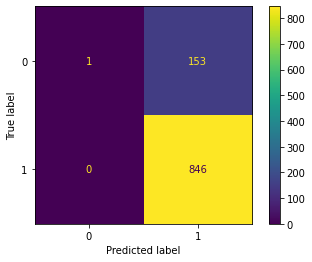

In [ ]:
run_naiveBayes_MN(ham_train, ham_test, spam_train, spam_test)

the accuracy of training set with BernoulliNB() : 0.9097938144329897
the accuracy of testing set with BernoulliNB(): 0.876
common words:  ['com', 'the', 'to', 'http', 'from', '2002', 'td', '3d']
unmmonWords:  ['ÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿó', 'extrapolated', 'extrasolar', 'extraterrestrial', 'regalia', 'extremeny', 'regal', 'refute']
              precision    recall  f1-score   support

           0       0.86      0.23      0.37       154
           1       0.88      0.99      0.93       846

    accuracy                           0.88      1000
   macro avg       0.87      0.61      0.65      1000
weighted avg       0.87      0.88      0.84      1000

[[ 36 118]
 [  6 840]]
confusion_matrix using Bernoulli Naive Bayes


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


(0.9097938144329897, 0.876)

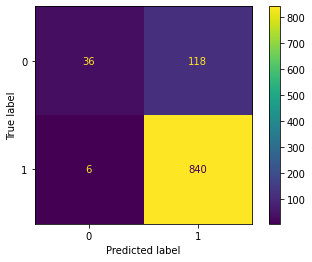

In [ ]:
run_naiveBayes_BN(ham_train, ham_test, spam_train, spam_test)

#Bernoulli Naive Bayes with different binarize

In [ ]:

#Changing binarize 

def run_naiveBayes_BN_binarize(ham_train, ham_test, spam_train, spam_test): 
   
  #labeling 
  array_of0s_train = np.zeros((len(spam_train)), dtype=int, order='F')
  array_of0s_test = np.zeros((len(spam_test)), dtype=int, order='F')

  array_of1s_train = np.ones((len(ham_train)), dtype=int, order='F')
  array_of1s_test = np.ones((len(ham_test)), dtype=int, order='F')
  
  Y_train = np.concatenate((array_of0s_train, array_of1s_train), axis=0)
  Y_test = np.concatenate((array_of0s_test, array_of1s_test), axis=0)
  X_train = np.concatenate((spam_train, ham_train), axis=0)
  X_test = np.concatenate((spam_test, ham_test), axis=0)
  
  #realse memory 
  array_of0s_train = []
  array_of1s_train = []
  array_of0s_test = [] 
  array_of1s_test = [] 
  
  spam_train = []
  spam_test = []
  ham_train = []
  ham_test = [] 

  acc_train_dtc = []
  acc_val_dtc = []
  i_value = [] 

  i = 0.0
  while(i < 10):
   pipeline = make_pipeline(
     TfidfVectorizer(), BernoulliNB(binarize = i)
   )
   pipeline.fit(X_train, Y_train)
   acc_temp_train = accuracy_score(Y_train, pipeline.predict(X_train))
   acc_train_dtc.append(acc_temp_train)
  
   acc_temp_val = accuracy_score(Y_test, pipeline.predict(X_test))
   acc_val_dtc.append(acc_temp_val)
   i_value.append(i)

   i+= 1


  plt.plot(i_value,acc_train_dtc,label="train")
  plt.plot(i_value,acc_val_dtc,label="val")
  plt.xlabel("binarize value")
  plt.ylabel("accuracy")
  plt.legend(loc="upper left")


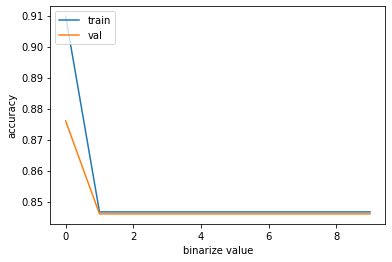

In [ ]:
run_naiveBayes_BN_binarize(ham_train, ham_test, spam_train, spam_test)

#Plot confusion Matrix

In [ ]:
def plot_confusion_Matrix_MN(ham_train, ham_test, spam_train, spam_test): 
   
  #labeling 
  array_of0s_train = np.zeros((len(spam_train)), dtype=int, order='F')
  array_of0s_test = np.zeros((len(spam_test)), dtype=int, order='F')

  array_of1s_train = np.ones((len(ham_train)), dtype=int, order='F')
  array_of1s_test = np.ones((len(ham_test)), dtype=int, order='F')
  
  Y_train = np.concatenate((array_of0s_train, array_of1s_train), axis=0)
  Y_test = np.concatenate((array_of0s_test, array_of1s_test), axis=0)
  X_train = np.concatenate((spam_train, ham_train), axis=0)
  X_test = np.concatenate((spam_test, ham_test), axis=0)
  
  #realse memory 
  array_of0s_train = []
  array_of1s_train = []
  array_of0s_test = [] 
  array_of1s_test = [] 
  
  spam_train = []
  spam_test = []
  ham_train = []
  ham_test = [] 

  pipeline = make_pipeline( TfidfVectorizer(), MultinomialNB() )
  pipeline.fit(X_train, Y_train)
  guesses = pipeline.predict(X_test)
  print(classification_report(Y_test, guesses))
  print(confusion_matrix(Y_test, guesses))
  plot_confusion_matrix(pipeline, X_test, Y_test)  

In [ ]:
def plot_confusion_Matrix_BN(ham_train, ham_test, spam_train, spam_test): 
   
  #labeling 
  array_of0s_train = np.zeros((len(spam_train)), dtype=int, order='F')
  array_of0s_test = np.zeros((len(spam_test)), dtype=int, order='F')

  array_of1s_train = np.ones((len(ham_train)), dtype=int, order='F')
  array_of1s_test = np.ones((len(ham_test)), dtype=int, order='F')
  
  Y_train = np.concatenate((array_of0s_train, array_of1s_train), axis=0)
  Y_test = np.concatenate((array_of0s_test, array_of1s_test), axis=0)
  X_train = np.concatenate((spam_train, ham_train), axis=0)
  X_test = np.concatenate((spam_test, ham_test), axis=0)
  
  #realse memory 
  array_of0s_train = []
  array_of1s_train = []
  array_of0s_test = [] 
  array_of1s_test = [] 
  
  spam_train = []
  spam_test = []
  ham_train = []
  ham_test = [] 

  pipeline = make_pipeline( TfidfVectorizer(), BernoulliNB() )
  pipeline.fit(X_train, Y_train)
  guesses = pipeline.predict(X_test)
  print(classification_report(Y_test, guesses))
  print(confusion_matrix(Y_test, guesses))
  plot_confusion_matrix(pipeline, X_test, Y_test)  

# Task 3

Run the function you wrote in the previous question on


i.	Spam versus easy-ham

ii.	Spam versus hard-ham


and include the results in your report. Report in addition to accuracy, also plots of the confusion matrices (see documentation for sklearn.metrics.confusion_matrix). 

i.	Spam versus easy-ham

* the accuracy of training set with MultinomialNB() : 0.9006529850746269
* the accuracy of testing set with MultinomialNB(): 0.883695652173913
* the accuracy of training set with BernoulliNB() : 0.925839552238806
* the accuracy of testing set with BernoulliNB(): 0.9065217391304348


ii.	Spam versus hard-ham

*   the accuracy of training set with MultinomialNB() : 0.8632162661737524
*   the accuracy of testing set with MultinomialNB(): 0.8461538461538461
*   the accuracy of training set with BernoulliNB() : 0.9038817005545287
*   the accuracy of testing set with BernoulliNB(): 0.8547008547008547



Why is only reporting accuracy not a good idea in this case? 

In this case we’re interested in one class in particular “finding spams”. So only reporting accuracy is not enough to meet our goal here because higher accuracy not always mean that meet the data analysis purpose better. For example, with Spam vs hard-ham, using BernoulliNB() shows better accuracy than MultinomialNB(). However, we will get more spam mails which predicted as ham (False Positive). We can use several evaluation metrics which are defined from the cells in a confusion matrix, and evaluate the model better. In this case, we have much less dataset for spam, as we can see in the confusion matrix (False positive)   
The precision and recall metrics are probably the most common, and we can caluate with those formula.

* $P$ = TP / (TP + FP)

* $R$ = TP / (TP + FN)


#i. Spam versus easy-ham

the accuracy of training set with MultinomialNB() : 0.9006529850746269
the accuracy of testing set with MultinomialNB(): 0.883695652173913
common words:  ['com', 'to', 'the', 'from', '2002', 'net', 'for', 'with']
unmmonWords:  ['ÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿó', 'rp7d', 'fijm8h', 'fijs5mnu7ki3d86weig7tbi5y4is0tluuuczs4v4dougv1j', 'rp3b1amnii2t3', 'rp1fcdrlcydnh1', 'filedescriptor', 'filehandle']
              precision    recall  f1-score   support

           0       1.00      0.31      0.47       154
           1       0.88      1.00      0.93       766

    accuracy                           0.88       920
   macro avg       0.94      0.65      0.70       920
weighted avg       0.90      0.88      0.86       920

[[ 47 107]
 [  0 766]]
confusion_matrix using Multinomial Naive Bayes


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


the accuracy of training set with BernoulliNB() : 0.925839552238806
the accuracy of testing set with BernoulliNB(): 0.9065217391304348
common words:  ['com', 'to', 'the', 'from', '2002', 'net', 'for', 'with']
unmmonWords:  ['ÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿó', 'rp7d', 'fijm8h', 'fijs5mnu7ki3d86weig7tbi5y4is0tluuuczs4v4dougv1j', 'rp3b1amnii2t3', 'rp1fcdrlcydnh1', 'filedescriptor', 'filehandle']
              precision    recall  f1-score   support

           0       0.99      0.45      0.62       154
           1       0.90      1.00      0.95       766

    accuracy                           0.91       920
   macro avg       0.94      0.72      0.78       920
weighted avg       0.91      0.91      0.89       920

[[ 69  85]
 [  1 765]]
confusion_matrix using Bernoulli Naive Bayes


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


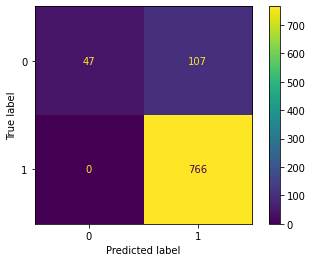

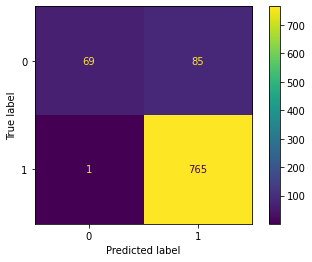

In [ ]:
# Preparing input datasets 

spam_train, spam_test = train_test_split(spam.data, test_size=0.3, random_state=12000)
easy_ham_train, easy_ham_test = train_test_split(easy_ham.data,  test_size=0.3, random_state=12000)

#function call 
acc_MN_easy = run_naiveBayes_MN(easy_ham_train, easy_ham_test, spam_train, spam_test)
acc_BN_easy = run_naiveBayes_BN(easy_ham_train, easy_ham_test, spam_train, spam_test)


# ii. Spam versus hard-ham

the accuracy of training set with MultinomialNB() : 0.8632162661737524
the accuracy of testing set with MultinomialNB(): 0.8461538461538461
common words:  ['com', 'td', 'http', '3d', 'font', 'width', 'the', 'www']
unmmonWords:  ['idiolect', 'lzwybvrg9b3saxwal0gitmusdnbf0qx', 'lzxmmcu8qasuuuayztrvpfrcrbllwmx2hgczapq', 'lzxoku7q4fnsid', 'línguas', 'lösungsteil', 'm0', 'm05irnsdhju']
              precision    recall  f1-score   support

           0       0.81      1.00      0.90       154
           1       1.00      0.55      0.71        80

    accuracy                           0.85       234
   macro avg       0.91      0.78      0.80       234
weighted avg       0.88      0.85      0.83       234

[[154   0]
 [ 36  44]]
confusion_matrix using Multinomial Naive Bayes


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


the accuracy of training set with BernoulliNB() : 0.9038817005545287
the accuracy of testing set with BernoulliNB(): 0.8547008547008547
common words:  ['com', 'td', 'http', '3d', 'font', 'width', 'the', 'www']
unmmonWords:  ['idiolect', 'lzwybvrg9b3saxwal0gitmusdnbf0qx', 'lzxmmcu8qasuuuayztrvpfrcrbllwmx2hgczapq', 'lzxoku7q4fnsid', 'línguas', 'lösungsteil', 'm0', 'm05irnsdhju']
              precision    recall  f1-score   support

           0       0.83      0.97      0.90       154
           1       0.93      0.62      0.75        80

    accuracy                           0.85       234
   macro avg       0.88      0.80      0.82       234
weighted avg       0.86      0.85      0.85       234

[[150   4]
 [ 30  50]]
confusion_matrix using Bernoulli Naive Bayes


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


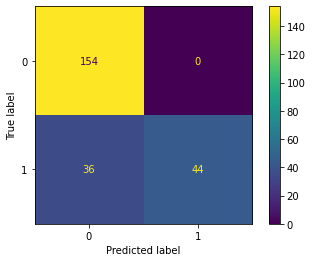

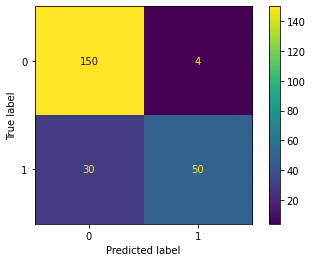

In [ ]:
# Preparing input datasets 

spam_train, spam_test = train_test_split(spam.data, test_size=0.3, random_state=12000)
hard_ham_train, hard_ham_test = train_test_split(hard_ham.data,  test_size=0.3, random_state=12000)

#function call 
acc_MN_hard = run_naiveBayes_MN(hard_ham_train, hard_ham_test, spam_train, spam_test)
acc_BN_hard = run_naiveBayes_BN(hard_ham_train, hard_ham_test, spam_train, spam_test)


# Task 4

To avoid classification based on common and uninformative words it is common to filter these out. 

#A.
Argue why this may be useful. Try finding the words that are too common/uncommon in the dataset. 

I think it's useful in some cases. For example, the words like a, an, the, and so on those are very commonly used in the sentence however, it's hard to say they are informative. By ignoring those irrelevant words, we may get better accuracy on our model. As shown in the arrays of too common and uncommon words below, those common words do not relate to spam or ham and it supports my assumption. Also, uncommon words do not give useful information for classification because they are too rare to find relations. 

Spam versus hard-ham (other data combination also has this words in each function)

*   common words:  ['com', 'the', 'to', 'http', 'from', '2002', 'td', '3d']
*   uncommonWords:  ['ÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿó', 'extrapolated', 'extrasolar', 'extraterrestrial', 'regalia', 'extremeny', 'regal', 'refute']




            




#B
 Use the parameters in Sklearn’s CountVectorizer to filter out these words. Run the updated program on your data and record how the results differ from 3. You have two options to do this in Sklearn: either using the words found in part (a) or letting Sklearn do it for you.
 
Using the parameters in Sklearn’s CountVectorizer: max_dffloat and min_dffloat, I have filtered too common/uncommon words in the datasets. I used the float value which represents a proportion of documents. I gave an upper threshold of 0.5 and a lower threshold of 0.005 so that it cut off the words outside of boundaries when it comes to frequency. Overall classification accuracy increases both classification algorithms after filtering. Here is an example of <spam vs easyham>. 


[Before filtering] in Task 3 

confusion_matrix using Multinomial Naive Bayes

              precision    recall  f1-score   support

           0       1.00      0.31      0.47       154
           1       0.88      1.00      0.93       766

    accuracy                           0.88       920
   macro avg       0.94      0.65      0.70       920
weighted avg       0.90      0.88      0.86       920


confusion_matrix using Bernoulli Naive Bayes 

              precision    recall  f1-score   support

           0       0.99      0.45      0.62       154
           1       0.90      1.00      0.95       766

    accuracy                           0.91       920
   macro avg       0.94      0.72      0.78       920
weighted avg       0.91      0.91      0.89       920

[After filtering] in Task 4

confusion_matrix using Multinomial Naive Bayes and filter common/uncommon words

the accuracy of the training set with MultinomialNB() : 0.9892723880597015

the accuracy of the testing set with MultinomialNB(): 0.9923913043478261

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       154
           1       0.99      1.00      1.00       766
    accuracy                           0.99       920
   macro avg       0.99      0.98      0.99       920
weighted avg       0.99      0.99      0.99       920

confusion_matrix using Bernoulli Naive Bayes and filter common/uncommon words

the accuracy of training set with BernoulliNB() : 0.9785447761194029

the accuracy of the testing set with BernoulliNB(): 0.9739130434782609

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       154
           1       0.99      0.98      0.98       766
    accuracy                           0.97       920
   macro avg       0.95      0.96      0.95       920
weighted avg       0.97      0.97      0.97       920

In [ ]:
# write a function for runining naiveBayes with the given name and arguments: 

def run_naiveBayes_MN_filtered(ham_train, ham_test, spam_train, spam_test): 
   
  #labeling 
  array_of0s_train = np.zeros((len(spam_train)), dtype=int, order='F')
  array_of0s_test = np.zeros((len(spam_test)), dtype=int, order='F')

  array_of1s_train = np.ones((len(ham_train)), dtype=int, order='F')
  array_of1s_test = np.ones((len(ham_test)), dtype=int, order='F')
  
  Y_train = np.concatenate((array_of0s_train, array_of1s_train), axis=0)
  Y_test = np.concatenate((array_of0s_test, array_of1s_test), axis=0)
  X_train = np.concatenate((spam_train, ham_train), axis=0)
  X_test = np.concatenate((spam_test, ham_test), axis=0)
  
  #realse memory 
  array_of0s_train = []
  array_of1s_train = []
  array_of0s_test = [] 
  array_of1s_test = [] 
  
  spam_train = []
  spam_test = []
  ham_train = []
  ham_test = [] 

  
 # transform documents to matrix format 
  vectorizer = CountVectorizer(max_df=0.05, min_df=0.005)
  X_train_vec = vectorizer.fit_transform(X_train)
  vectorizer.get_feature_names_out()
  pipeline = make_pipeline( TfidfVectorizer(smooth_idf=True, max_df=0.05, min_df=0.005 ), MultinomialNB()) # 
  pipeline.fit(X_train, Y_train)
  acc_train = accuracy_score(Y_train, pipeline.predict(X_train))
  acc_val = accuracy_score(Y_test, pipeline.predict(X_test))

  print('the accuracy of training set with MultinomialNB() :',acc_train)
  print('the accuracy of testing set with MultinomialNB():', acc_val)

   #Plot confusion matrix
  guesses = pipeline.predict(X_test)
  print(classification_report(Y_test, guesses))
  print(confusion_matrix(Y_test, guesses))
  print('confusion_matrix using Multinomial Naive Bayes and filter common/uncommon words')
  plot_confusion_matrix(pipeline, X_test, Y_test)  

  return acc_train,acc_val  

In [ ]:
# write a function for runining naiveBayes with the given name and arguments: 

def run_naiveBayes_BN_filtered(ham_train, ham_test, spam_train, spam_test): 
   
  #labeling 
  array_of0s_train = np.zeros((len(spam_train)), dtype=int, order='F')
  array_of0s_test = np.zeros((len(spam_test)), dtype=int, order='F')

  array_of1s_train = np.ones((len(ham_train)), dtype=int, order='F')
  array_of1s_test = np.ones((len(ham_test)), dtype=int, order='F')
  
  Y_train = np.concatenate((array_of0s_train, array_of1s_train), axis=0)
  Y_test = np.concatenate((array_of0s_test, array_of1s_test), axis=0)
  X_train = np.concatenate((spam_train, ham_train), axis=0)
  X_test = np.concatenate((spam_test, ham_test), axis=0)
  
  #realse memory 
  array_of0s_train = []
  array_of1s_train = []
  array_of0s_test = [] 
  array_of1s_test = [] 
  
  spam_train = []
  spam_test = []
  ham_train = []
  ham_test = [] 


 # transform documents to matrix format 
  vectorizer = CountVectorizer(max_df=0.05, min_df=0.005)
  X_train_vec = vectorizer.fit_transform(X_train)
  vectorizer.get_feature_names_out()

  pipeline = make_pipeline( TfidfVectorizer(smooth_idf=True, max_df=0.05, min_df=0.005), BernoulliNB() )
  pipeline.fit(X_train, Y_train)
  acc_train = accuracy_score(Y_train, pipeline.predict(X_train))
  acc_val = accuracy_score(Y_test, pipeline.predict(X_test))

  print('the accuracy of training set with BernoulliNB() :',acc_train)
  print('the accuracy of testing set with BernoulliNB():', acc_val)

   #Plot confusion matrix
  guesses = pipeline.predict(X_test)
  print(classification_report(Y_test, guesses))
  print(confusion_matrix(Y_test, guesses))
  print('confusion_matrix using Bernoulli Naive Bayes and filter common/uncommon words')
  plot_confusion_matrix(pipeline, X_test, Y_test)  

  return acc_train,acc_val  

<spam vs easy ham> with filter of common/uncommon words
the accuracy of training set with MultinomialNB() : 0.9892723880597015
the accuracy of testing set with MultinomialNB(): 0.9923913043478261
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       154
           1       0.99      1.00      1.00       766

    accuracy                           0.99       920
   macro avg       0.99      0.98      0.99       920
weighted avg       0.99      0.99      0.99       920

[[148   6]
 [  1 765]]
confusion_matrix using Multinomial Naive Bayes and filter common/uncommon words


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


the accuracy of training set with BernoulliNB() : 0.9785447761194029
the accuracy of testing set with BernoulliNB(): 0.9739130434782609
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       154
           1       0.99      0.98      0.98       766

    accuracy                           0.97       920
   macro avg       0.95      0.96      0.95       920
weighted avg       0.97      0.97      0.97       920

[[145   9]
 [ 15 751]]
confusion_matrix using Bernoulli Naive Bayes and filter common/uncommon words


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


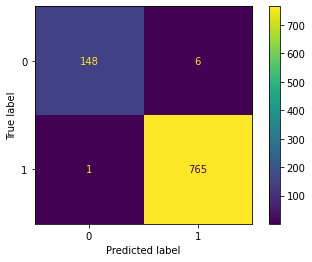

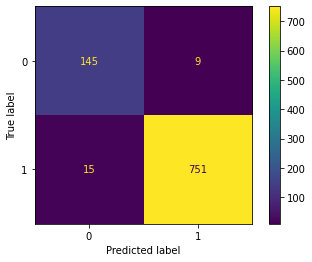

In [ ]:
#function call 
print("<spam vs easy ham> with filter of common/uncommon words")

acc_MN_easy_filtered = run_naiveBayes_MN_filtered(easy_ham_train, easy_ham_test, spam_train, spam_test)
acc_BN_easy_filtered = run_naiveBayes_BN_filtered(easy_ham_train, easy_ham_test, spam_train, spam_test)

<spam vs hard ham with filter of common/uncommon words>
the accuracy of training set with MultinomialNB() : 0.9722735674676525
the accuracy of testing set with MultinomialNB(): 0.9145299145299145
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       154
           1       1.00      0.75      0.86        80

    accuracy                           0.91       234
   macro avg       0.94      0.88      0.90       234
weighted avg       0.92      0.91      0.91       234

[[154   0]
 [ 20  60]]
confusion_matrix using Multinomial Naive Bayes and filter common/uncommon words


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


the accuracy of training set with BernoulliNB() : 0.9094269870609981
the accuracy of testing set with BernoulliNB(): 0.8504273504273504
              precision    recall  f1-score   support

           0       0.83      0.97      0.90       154
           1       0.92      0.61      0.74        80

    accuracy                           0.85       234
   macro avg       0.88      0.79      0.82       234
weighted avg       0.86      0.85      0.84       234

[[150   4]
 [ 31  49]]
confusion_matrix using Bernoulli Naive Bayes and filter common/uncommon words


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


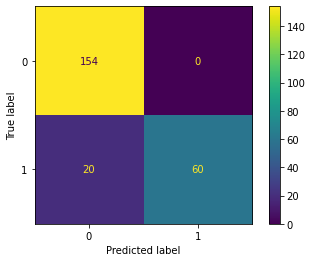

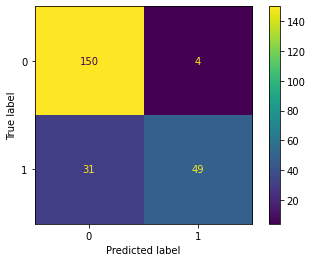

In [ ]:

#function call 
print("<spam vs hard ham with filter of common/uncommon words>")
acc_MN_hard_filtered = run_naiveBayes_MN_filtered(hard_ham_train, hard_ham_test, spam_train, spam_test)
acc_BN_hard_filtered = run_naiveBayes_BN_filtered(hard_ham_train, hard_ham_test, spam_train, spam_test)


#Task 5

Filter out the headers and the footers of the emails before you run on them. The format may vary somewhat between emails, which can make this a bit tricky, so perfect filtering is not required. Run your program again and answer the following questions: 

#A. 

Does the result improve from 3 and 4?

-> I have filtered out the headers and the footers of the emails. Because there is no definite standardized format of headers and footers, several policies can be proposed. For example, I can ignore the first 10 lines of emails or certain formats such as email addresses. However, both policies may not work well because we have to consider a trade-off between removing irrelevant data and the loss of useful data. My suggestion is that split the data by 'Subject:' because the title of the email contains meaningful words and also an indication of starting email contents. For the footers, there are no common structural characteristics so I minimize filtering footers so that I can keep the mail contents as much as possible. 

-> I ran the program in Task3 and Task 4 again. The result is not always improved. With Multinomial Naive Bayes, both results of Task 3 and Task 4 improved in terms of accuracy. However, with Bernoulli Naive Bayes, accuracy decrease for both cases, and also the number of False Positive is significantly increased. 
There can be various reasons for such a result. First of all, the policy of filtering header and footer may not correct and affect the result by losing important information, especially spam data set which has relatively fewer data. In addition, by removing headers and footers, the set of too common/uncommon words was changed, and the individual counts as well. The previous value of the parameters max_df=0.05 and min_df=0.005 need to be adjusted too. 





**The result from 3 with the data header and footer filtered **


the accuracy of training set with MultinomialNB() : 0.9123134328358209
the accuracy of testing set with MultinomialNB(): 0.8923913043478261
common words:  ['the', 'to', 'com', 'of', 'and', 'list', '3d', 'net']
unmmonWords:  ['ibiblio', 'lowers', 'lowkv3dfb', 'lowlifes', 'lows', 'loxokl5jqkykwnncfiygqpruwicolenejit9gb2mwmu0t1m', 'lp1ipymce1y6ywadm1gi', 'lp3betovtcqpchh']
              precision    recall  f1-score   support

           0       1.00      0.36      0.53       154
           1       0.89      1.00      0.94       766

    accuracy                           0.89       920
   macro avg       0.94      0.68      0.73       920
weighted avg       0.90      0.89      0.87       920

[[ 55  99]
 [  0 766]]
confusion_matrix using Multinomial Naive Bayes


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


the accuracy of training set with BernoulliNB() : 0.9146455223880597
the accuracy of testing set with BernoulliNB(): 0.8989130434782608
common words:  ['the', 'to', 'com', 'of', 'and', 'list', '3d', 'net']
unmmonWords:  ['ibiblio', 'lowers', 'lowkv3dfb', 'lowlifes', 'lows', 'loxokl5jqkykwnncfiygqpruwicolenejit9gb2mwmu0t1m', 'lp1ipymce1y6ywadm1gi', 'lp3betovtcqpchh']
              precision    recall  f1-score   support

           0       0.96      0.42      0.58       154
           1       0.89      1.00      0.94       766

    accuracy                           0.90       920
   macro avg       0.92      0.71      0.76       920
weighted avg       0.90      0.90      0.88       920

[[ 64  90]
 [  3 763]]
confusion_matrix using Bernoulli Naive Bayes


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


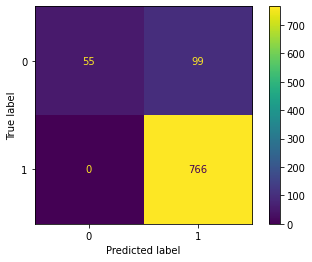

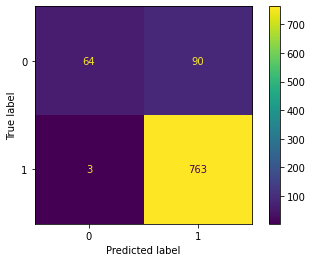

In [ ]:
# Preparing input datasets with the data header and footer filtered 

spam_train, spam_test = train_test_split(spam_footer_removed, test_size=0.3, random_state=12000)
easy_ham_train, easy_ham_test = train_test_split(easy_ham_footer_removed,  test_size=0.3, random_state=12000)

#function call 
acc_MN_easy = run_naiveBayes_MN(easy_ham_train, easy_ham_test, spam_train, spam_test)
acc_BN_easy = run_naiveBayes_BN(easy_ham_train, easy_ham_test, spam_train, spam_test)

the accuracy of training set with MultinomialNB() : 0.8872458410351202
the accuracy of testing set with MultinomialNB(): 0.8760683760683761
common words:  ['td', 'http', '3d', 'com', 'font', 'width', 'www', 'tr']
unmmonWords:  ['infamy', 'mgtvyzhmbybgeebxhq', 'mgtwd4azj8jeyygmfdhwtykdifxahr1fd5sa8icbwyjbm1kioaxbjrvgfw', 'mgvmdg3fek7vfo', 'mha', 'mharward1', 'mhe2ry', 'mhiqexgae9gxq6gnbemwojorcedi1ekzhwgvxtizhjgdf9k3ihgx8lnmxtgz']
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       154
           1       1.00      0.64      0.78        80

    accuracy                           0.88       234
   macro avg       0.92      0.82      0.85       234
weighted avg       0.90      0.88      0.87       234

[[154   0]
 [ 29  51]]
confusion_matrix using Multinomial Naive Bayes


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


the accuracy of training set with BernoulliNB() : 0.8909426987060998
the accuracy of testing set with BernoulliNB(): 0.8504273504273504
common words:  ['td', 'http', '3d', 'com', 'font', 'width', 'www', 'tr']
unmmonWords:  ['infamy', 'mgtvyzhmbybgeebxhq', 'mgtwd4azj8jeyygmfdhwtykdifxahr1fd5sa8icbwyjbm1kioaxbjrvgfw', 'mgvmdg3fek7vfo', 'mha', 'mharward1', 'mhe2ry', 'mhiqexgae9gxq6gnbemwojorcedi1ekzhwgvxtizhjgdf9k3ihgx8lnmxtgz']
              precision    recall  f1-score   support

           0       0.83      0.97      0.89       154
           1       0.91      0.62      0.74        80

    accuracy                           0.85       234
   macro avg       0.87      0.80      0.82       234
weighted avg       0.86      0.85      0.84       234

[[149   5]
 [ 30  50]]
confusion_matrix using Bernoulli Naive Bayes


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


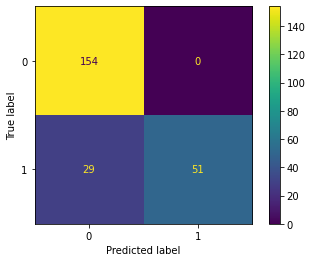

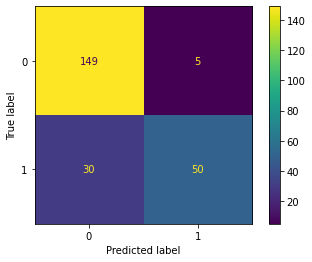

In [ ]:
# Preparing input datasets with the data header and footer filtered 

spam_train, spam_test = train_test_split(spam_footer_removed, test_size=0.3, random_state=12000)
hard_ham_train, hard_ham_test = train_test_split(hard_ham_footer_removed,  test_size=0.3, random_state=12000)

#function call 
acc_MN_hard = run_naiveBayes_MN(hard_ham_train, hard_ham_test, spam_train, spam_test)
acc_BN_hard = run_naiveBayes_BN(hard_ham_train, hard_ham_test, spam_train, spam_test)

**The resulit from 4 with the data header and footer filtered **

<spam vs easy ham> with filter of common/uncommon words
the accuracy of training set with MultinomialNB() : 0.9841417910447762
the accuracy of testing set with MultinomialNB(): 0.9782608695652174
              precision    recall  f1-score   support

           0       0.98      0.89      0.93       154
           1       0.98      1.00      0.99       766

    accuracy                           0.98       920
   macro avg       0.98      0.94      0.96       920
weighted avg       0.98      0.98      0.98       920

[[137  17]
 [  3 763]]
confusion_matrix using Multinomial Naive Bayes and filter common/uncommon words


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


the accuracy of training set with BernoulliNB() : 0.9617537313432836
the accuracy of testing set with BernoulliNB(): 0.9510869565217391
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       154
           1       0.97      0.97      0.97       766

    accuracy                           0.95       920
   macro avg       0.91      0.91      0.91       920
weighted avg       0.95      0.95      0.95       920

[[130  24]
 [ 21 745]]
confusion_matrix using Bernoulli Naive Bayes and filter common/uncommon words


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


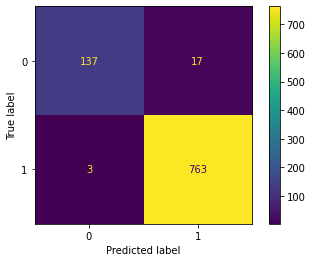

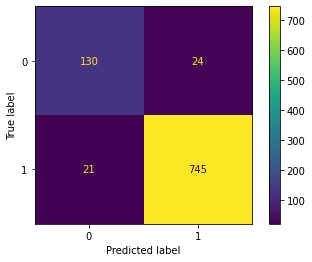

In [ ]:

#function call 
print("<spam vs easy ham> with filter of common/uncommon words")

acc_MN_easy_filtered = run_naiveBayes_MN_filtered(easy_ham_train, easy_ham_test, spam_train, spam_test)
acc_BN_easy_filtered = run_naiveBayes_BN_filtered(easy_ham_train, easy_ham_test, spam_train, spam_test)

<spam vs hard ham with filter of common/uncommon words>
the accuracy of training set with MultinomialNB() : 0.9685767097966729
the accuracy of testing set with MultinomialNB(): 0.9358974358974359
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       154
           1       1.00      0.81      0.90        80

    accuracy                           0.94       234
   macro avg       0.96      0.91      0.93       234
weighted avg       0.94      0.94      0.93       234

[[154   0]
 [ 15  65]]
confusion_matrix using Multinomial Naive Bayes and filter common/uncommon words


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


the accuracy of training set with BernoulliNB() : 0.8853974121996303
the accuracy of testing set with BernoulliNB(): 0.8376068376068376
              precision    recall  f1-score   support

           0       0.82      0.97      0.89       154
           1       0.90      0.59      0.71        80

    accuracy                           0.84       234
   macro avg       0.86      0.78      0.80       234
weighted avg       0.85      0.84      0.83       234

[[149   5]
 [ 33  47]]
confusion_matrix using Bernoulli Naive Bayes and filter common/uncommon words


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


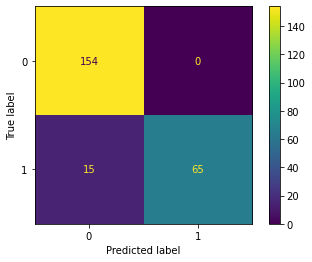

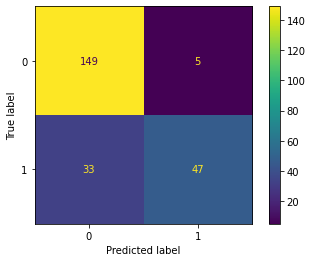

In [ ]:
#function call 
print("<spam vs hard ham with filter of common/uncommon words>")
acc_MN_hard_filtered = run_naiveBayes_MN_filtered(hard_ham_train, hard_ham_test, spam_train, spam_test)
acc_BN_hard_filtered = run_naiveBayes_BN_filtered(hard_ham_train, hard_ham_test, spam_train, spam_test)

# B.  
The split of the data set into a training set and a test set can lead to very skewed results. Why is this, and do you have suggestions on remedies?

Given datasets, as I mentioned in task 1, there is a big difference in the number of emails in each of the categories (easy_ham : 2553, hard_ham : 264 
, spam: 511) We did not calibrate data here and this difference in data may lead models to be biased to the majority labels. For example, in our case classification dataset if the ham is present in 85% of the data so the learned model could simply predict the ham class which is the majority, irrespective of the features. There are several remedies to reduce the skewed problem. 

- Upsampling or Downsampling the dataset to make the representation of the classes equally. for downsampling, it's better to select randomly 500 spam and 500 non-spam for training for example. 

- Using training algorithms that attach weights according to the frequency of the labels using tree-based algorithms.

- Calibration of the models also helps training after training could also help.

Moreover, there is an idea of splitting in the first place. Even though there is no optimal percentage of train and training sets and depends on the characteristics of the model. If there is less training data, then the model will have a high variance in training. If there is less testing data, then the model evaluation can be unstable that is having high variance. 

#C.  

What do you expect would happen if your training set were mostly spam messages while your test set were mostly ham messages?

-> If the training set and test set are inherently imbalanced, the classification might work badly. The quality of the training data is really important to improve the model performance. In addition, the machine learning algorithms are sensitive to the training data, even small variations or imbalances in the training set can lead to a significantly bad result in the model performance. For example, if in the training set were mostly spam messages, simply guessing it's spam without proper classification has high accuracy. Therefore, we shouldn’t rely on accuracy to evaluate the classification and check the F1 score as well. That's because Machine learning algorithms might perform poorly for the smaller classes for example ham messages in training set in this example. There are several potential solutions such as class weights in the learning algorithm, upsampling/downsampling of the data, and data augmentation to generate instances of the rare classes. 